# __Pipeline 3, Pt 1__
## _IQR --> Normalization --> Z Score_

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

### __Import Data__

In [2]:
data_cat_enc = pd.read_csv('data_cat_enc.csv')

In [3]:
data_cont = pd.read_csv('data_cont.csv')

In [4]:
target_values = pd.read_csv('target_values.csv')

## __IQR__

- Due to the results, the IQR step in this pipeline will be removed.
- As shown in the box plot below, the outliers have been removed from the dataset by using the IQR ratios, but the data still looks unbalanced. 
- By looking further into the results using '.describe()', it shows that both the min and max for Informational, Informational_Duration, and PageValues are 0. That being said, the only descriptive data left these variables is count of values, meaning the IQR converted all of the values to 0.
- By looking at the histograms below, it is clear that the reason for IQR converting all the values to 0 for these 3 varaibles is because in the original data, almost all of the variables are 0.

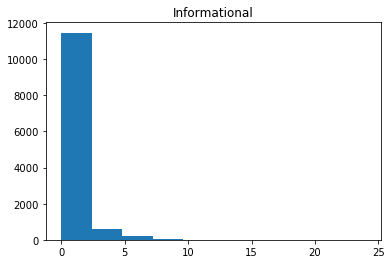

In [5]:
plt.hist(data_cont['Informational'])
plt.title("Informational")
plt.show()

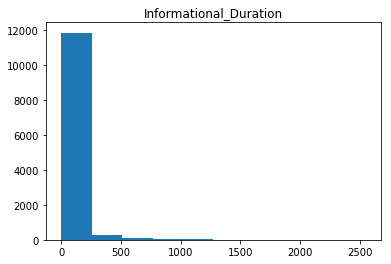

In [6]:
hist = plt.hist(data_cont['Informational_Duration'])
plt.title("Informational_Duration")
plt.show()

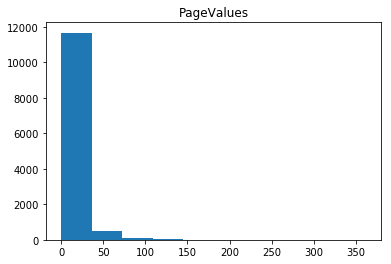

In [7]:
hist = plt.hist(data_cont['PageValues'])
plt.title("PageValues")
plt.show()

__Upper Bound:__

In [8]:
# for col in data_cont.columns:
#   u_bound = data_cont[col].quantile(0.75) + (1.5*(data_cont[col].quantile(0.75)-data_cont[col].quantile(0.25)))
#   data_cont[col][data_cont[col] > u_bound] = u_bound

__Lower Bound:__

In [9]:
# for col in data_cont.columns:
#    l_bound = data_cont[col].quantile(0.25) - (1.5*(data_cont[col].quantile(0.75)-data_cont[col].quantile(0.25)))
#    data_cont[col][data_cont[col] < l_bound] = l_bound

__Box Plot:__

In [10]:
# data_cont.boxplot(vert=False, figsize=(15,10))
# plt.title('Online Shoppers Intentions Box Plot')
# plt.show()

In [11]:
# data_cont.describe()

### __Normalization__

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [12]:
data_cont.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
dtype: float64

In [13]:
data_cont['AdministrativeSkew'] = stats.yeojohnson(data_cont['Administrative'])[0]

In [14]:
data_cont['Administrative_DurationSkew'] = stats.yeojohnson(data_cont['Administrative_Duration'])[0]

In [15]:
data_cont['InformationalSkew'] = stats.yeojohnson(data_cont['Informational'])[0]

In [16]:
data_cont['Informational_DurationSkew'] = stats.yeojohnson(data_cont['Informational_Duration'])[0]

In [17]:
data_cont['ProductRelatedSkew'] = stats.yeojohnson(data_cont['ProductRelated'])[0]

In [18]:
data_cont['ProductRelated_DurationSkew'] = stats.yeojohnson(data_cont['ProductRelated_Duration'])[0]

In [19]:
data_cont['BounceRatesSkew'] = stats.yeojohnson(data_cont['BounceRates'])[0]

In [20]:
data_cont['ExitRatesSkew'] = stats.yeojohnson(data_cont['ExitRates'])[0]

In [21]:
data_cont['PageValuesSkew'] = stats.yeojohnson(data_cont['PageValues'])[0]

In [22]:
data_cont_norm = data_cont.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration',
                                 'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues'], axis=1)

In [23]:
data_cont_norm.skew()

AdministrativeSkew             0.243728
Administrative_DurationSkew    0.145485
InformationalSkew              1.404111
Informational_DurationSkew     1.546903
ProductRelatedSkew            -0.002576
ProductRelated_DurationSkew   -0.036336
BounceRatesSkew                1.032599
ExitRatesSkew                  0.433598
PageValuesSkew                 1.377420
dtype: float64

In [24]:
data_cont_norm['BounceRatesSkew'] = data_cont_norm['BounceRatesSkew'].apply(np.sqrt)

In [25]:
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)

In [26]:
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)

In [27]:
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)

- InformationalSkew, Informational_DurationSkew, and PageValuesSkew are highly skewed because of the distribution of its values.
- The majority of the values are 0, making it very hard to correct the skewness; yeojohnson did not skew them to between -0.5 and 0.5.
- Doing it by hand after yeojohnson did not correct the skewness much more either.

In [28]:
data_cont_norm.skew()

AdministrativeSkew             0.243728
Administrative_DurationSkew    0.145485
InformationalSkew              1.399352
Informational_DurationSkew     1.539398
ProductRelatedSkew            -0.002576
ProductRelated_DurationSkew   -0.036336
BounceRatesSkew                0.391015
ExitRatesSkew                  0.433598
PageValuesSkew                 1.342251
dtype: float64

__Visualize the Results through Histograms__

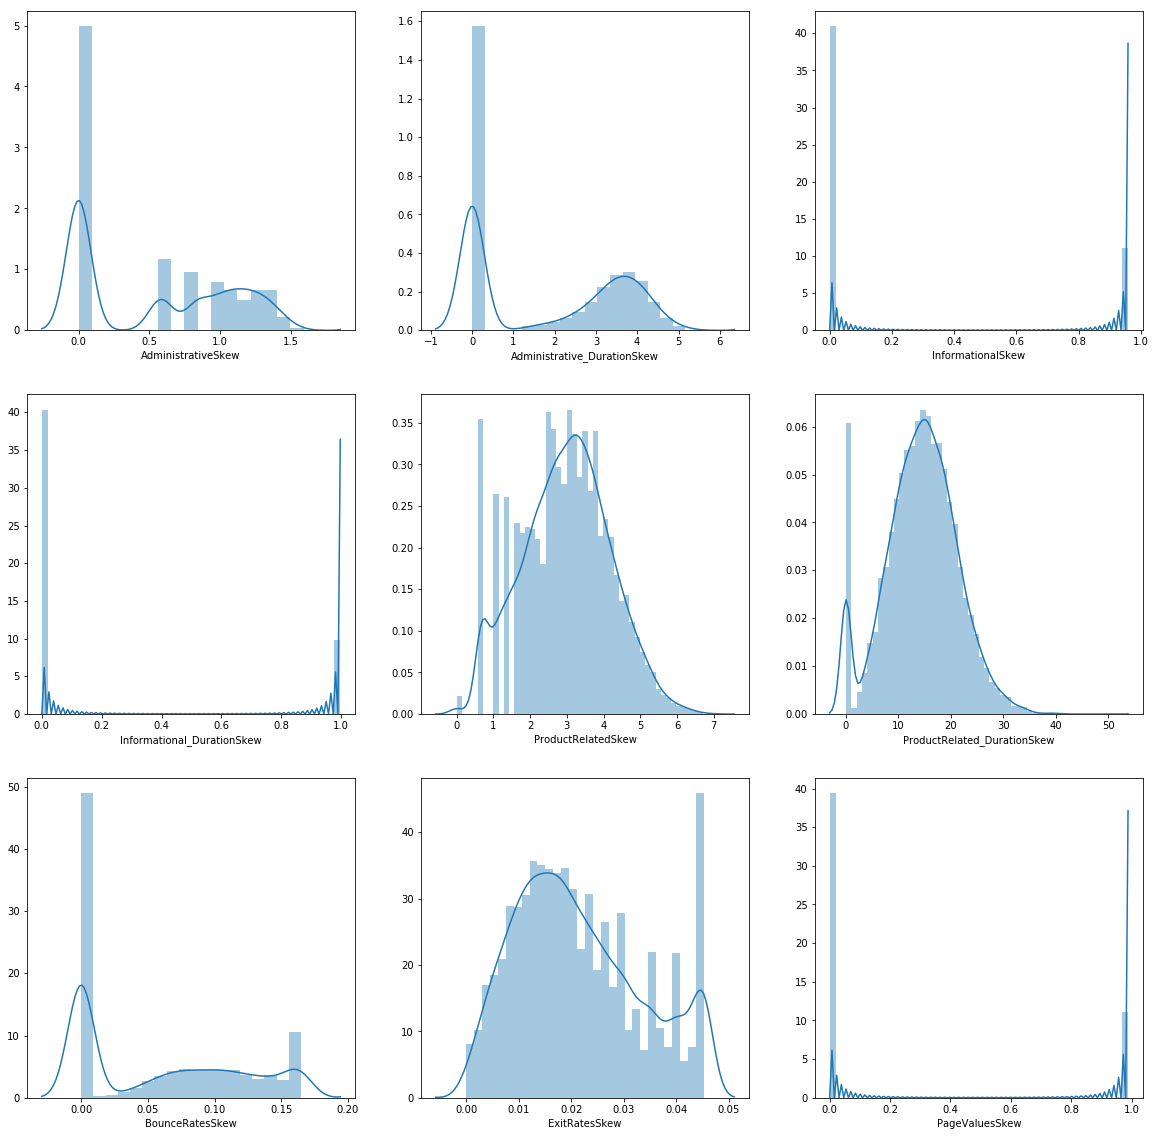

In [29]:
f, axes = plt.subplots(3, 3, figsize=(20,20), sharex=False)
sns.distplot(data_cont_norm["AdministrativeSkew"] , ax=axes[0, 0])
sns.distplot(data_cont_norm["Administrative_DurationSkew"] , ax=axes[0, 1])
sns.distplot(data_cont_norm["InformationalSkew"] , ax=axes[0, 2])
sns.distplot(data_cont_norm["Informational_DurationSkew"] , ax=axes[1, 0])
sns.distplot(data_cont_norm["ProductRelatedSkew"] , ax=axes[1, 1])
sns.distplot(data_cont_norm["ProductRelated_DurationSkew"] , ax=axes[1, 2])
sns.distplot(data_cont_norm["BounceRatesSkew"] , ax=axes[2, 0])
sns.distplot(data_cont_norm["ExitRatesSkew"] , ax=axes[2, 1])
sns.distplot(data_cont_norm["PageValuesSkew"] , ax=axes[2, 2])
plt.show()

## __Z Score__

In [30]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_cont_norm = scaler.fit_transform(data_cont_norm)
data_cont_transform = pd.DataFrame(data_cont_norm)

_Rename the columns back after the transformation_

In [31]:
data_cont_transform.columns=['AdministrativeSkew','Administrative_DurationSkew','InformationalSkew','Informational_DurationSkew',
                             'ProductRelatedSkew', 'ProductRelated_DurationSkew','BounceRatesSkew','ExitRatesSkew','PageValuesSkew']

In [32]:
data_cont_transform.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-0.974179,1.569866,-0.533259
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.499177,1.832073,-0.533259
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,0.973760,0.722460,-0.533259


__Analyze the Results:__

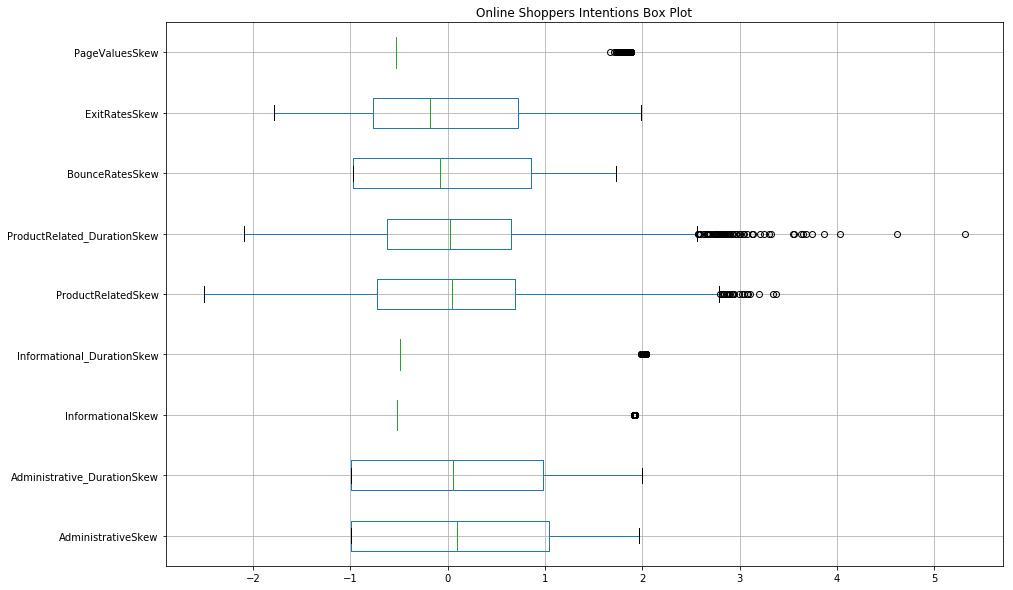

In [33]:
data_cont_transform.boxplot(vert=False, figsize=(15,10))
plt.title('Online Shoppers Intentions Box Plot')
plt.show()

In [34]:
data_cont_transform.describe()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-1.872882e-16,2.189832e-17,7.376275e-17,-2.535595e-17,4.056951e-16,-2.489493e-16,-5.762715e-18,9.681361e-17,8.183055e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.901281e-01,-9.966585e-01,-5.208308e-01,-4.922567e-01,-2.510230e+00,-2.096783e+00,-9.741795e-01,-1.785861e+00,-5.332586e-01
25%,-9.901281e-01,-9.966585e-01,-5.208308e-01,-4.922567e-01,-7.226106e-01,-6.242660e-01,-9.741795e-01,-7.685399e-01,-5.332586e-01
50%,9.173732e-02,5.230410e-02,-5.208308e-01,-4.922567e-01,4.187334e-02,2.792895e-02,-8.416743e-02,-1.855159e-01,-5.332586e-01
75%,1.040186e+00,9.814307e-01,-5.208308e-01,-4.922567e-01,6.869881e-01,6.547706e-01,8.594967e-01,7.224596e-01,-5.332586e-01
max,1.964995e+00,1.995243e+00,1.922640e+00,2.033382e+00,3.375326e+00,5.313616e+00,1.733188e+00,1.982547e+00,1.879864e+00


## Correlation

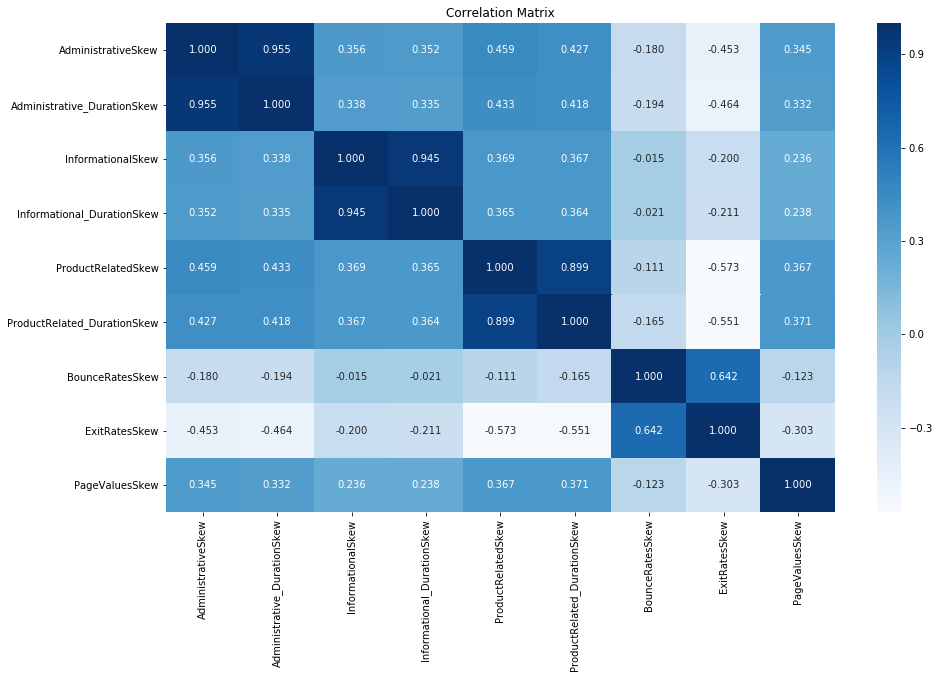

In [35]:
corr = data_cont_transform.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [36]:
pipeline3_1 = pd.concat([data_cont_transform,data_cat_enc,target_values], axis=1)
pipeline3_1.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-0.974179,1.569866,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.499177,1.832073,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,0.973760,0.722460,-0.533259,1,...,0,0,1,0,1,1,0,0,0,0


In [37]:
pipeline3_1.to_csv('../project2-deadlinedemons/pipeline3_1.csv', index=0)